In [1]:
# -*-coding:utf-8 -*-
# import all the libraries 
# python==3.8; jupyterlab==3.0.12; lumicks.pylake==0.8.1; matplotlib==3.3.4; more-itertools==8.7.0;
# npTDMS==1.1.0; numpy==1.20.1; opencv-python==4.5.1.48; pandas==1.2.3; scipy==1.6.1; tifffile==2021.3.5
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import interp1d
import scipy.optimize
%matplotlib widget

# Plot reference 
0. Fit the data point with a double exponential decay curve [https://stackoverflow.com/questions/30356619/how-to-fit-a-two-term-exponential-in-python ]
1. Setting a relative frequency in a matplotlib histogram [https://stackoverflow.com/questions/9767241/setting-a-relative-frequency-in-a-matplotlib-histogram]
2. Bin size in Matplotlib (Histogram) [https://stackoverflow.com/questions/6986986/bin-size-in-matplotlib-histogram]
3. logscale axis [https://stackoverflow.com/questions/773814/plot-logarithmic-axes-with-matplotlib-in-python]
4. binwidth for histogram Using the The Freedman-Diaconis Rules to calculate the binwidth: The bin-width is set to h=2×IQR×n^(−1/3),the number of bins is (max−min)/h; where IQR is the interquartile range of the data and n is the number of observations in the sample [https://stats.stackexchange.com/questions/798/calculating-optimal-number-of-bins-in-a-histogram]
5. Alternatively, The simplest method is to set the number of bins equal to the square root of the number of values you are binning.
6. Generate random numbers from exponential distribution [https://stackoverflow.com/questions/47319277/generate-random-numbers-from-exponential-distribution-and-model-using-python]
7. error band plot [https://stackoverflow.com/questions/55368485/draw-error-shading-bands-on-line-plot-python?noredirect=1&lq=1]

In [2]:
# read and plot the trajectory analysis data from Kymotracker
trace_name = input('please type in the file name:' ) + '.xlsx'
trace_path = input('please type in the file path:')
trace_file = os.path.join(trace_path, trace_name) 

please type in the file name: summary _SSB duration
please type in the file path: D:\Google Drive\T7 gp2.5 MS_2021\Data&CodeRepository\Fig3_reanalysis_11Mar2022


In [3]:
trace = pd.read_excel(trace_file,sheet_name='wt_6pN')
print(trace.head())
duration = trace['dt_ms']/1000
data = duration.dropna()
print(data)

   dt_ms  Unnamed: 1  Unnamed: 2    mean_s       SEM  Unnamed: 5  \
0   2338         NaN         NaN  1.086541  0.016692         NaN   
1   2338         NaN         NaN       NaN       NaN         NaN   
2   1169         NaN         NaN       NaN       NaN         NaN   
3   1169         NaN         NaN       NaN       NaN         NaN   
4    585         NaN         NaN       NaN       NaN         NaN   

   decay constant (s-1)     SEM.1  
0              0.920352  0.014139  
1                   NaN       NaN  
2                   NaN       NaN  
3                   NaN       NaN  
4                   NaN       NaN  
0        2.338
1        2.338
2        1.169
3        1.169
4        0.585
         ...  
13575    0.563
13576    0.563
13577    0.563
13578    0.562
13579    0.562
Name: dt_ms, Length: 13580, dtype: float64


In [4]:
a = round(np.min(data),2)
print(a)

0.77


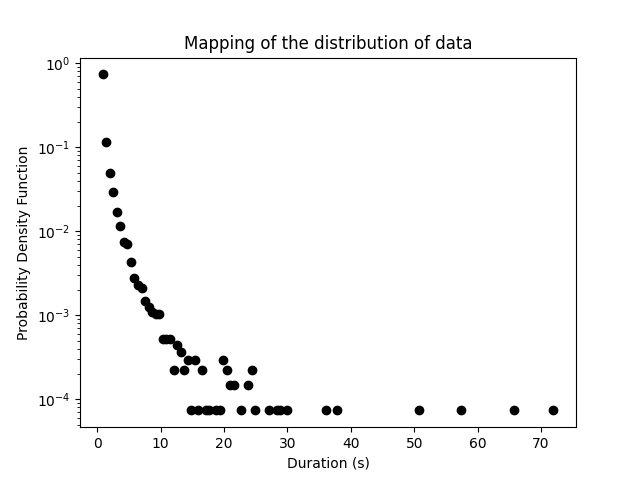

In [4]:
#calculate interquartile range and subsequent binwidth, and then histogram
# q3, q1 = np.percentile(data, [75 ,25])
# iqr = q3 - q1
# binwidth = (2* iqr) * len(data) ** (-1/3)
# print(binwidth)
binwidth = round(np.min(data),2)
# binwidth = 0.4

ydata,base = np.histogram(data,bins = np.arange(min(data), max(data)+ binwidth, binwidth), weights=np.zeros_like(data) + 1. / data.size)
xdata = base[:-1] + 0.5*binwidth

plt.figure()
plt.scatter(xdata, ydata, color="k")
plt.yscale('log')
# plt.ylim(0.001,1)
# plt.xlim(0,18)
plt.ylabel('Probability Density Function')
plt.xlabel('Duration (s)')
plt.title('Mapping of the distribution of data')
plt.show()
# plt.savefig(trace_file[:-18]+ 'Mapping of the distribution of data' +'.png', dpi=300)
# plt.savefig(trace_file[:-5]+ '_Mapping of the distribution of data' +'.png', dpi=300)

In [5]:
# this step is to fit the data in a specific range
xdata1 = xdata[np.where(xdata<18)]
ydata1 = ydata[np.where(xdata<18)]

R² = 0.9999697533299007


C:\Users\Stefan\AppData\Local\Temp/ipykernel_4028/2599044340.py:49: RuntimeWarning: overflow encountered in exp
  return a1 * np.exp(-k1 * x) + a2 * np.exp(-k2 * x)+ a3 * np.exp(-k3 * x)


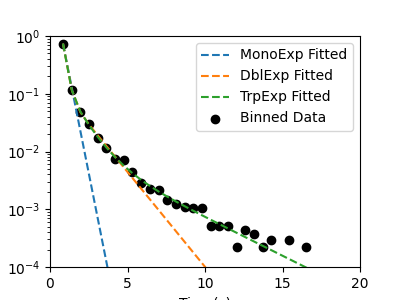

In [13]:
# for test
# fit the data with a monoExponential decay curve
def monoExp(x, a, k):
    return a * np.exp(-k * x) 

# perform the fit
popt, pcov = scipy.optimize.curve_fit(monoExp, xdata1, ydata1)
# a is the initial value A1, k is the decay constant
a, k = popt

# fit the data with a monoExponential decay curve
def DoubleExp(x, a1, k1,a2,k2):
    return a1 * np.exp(-k1 * x) + a2 * np.exp(-k2 * x)

# perform the fit
# Here you give the initial parameters for a,b,c which Python then iterates over to find the best fit

popt, pcov = scipy.optimize.curve_fit(DoubleExp, xdata1, ydata1,p0=(10,5.0,1.0,1.0))
# a1 & a2 is the initial value A1 & A2, k1 & k2 is the decay constant
a1, k1,a2, k2 = popt

# determine quality of the fit
squaredDiffs = np.square(ydata1 - DoubleExp(xdata1, a1, k1,a2,k2))
squaredDiffsFromMean = np.square(ydata1 - np.mean(ydata1))
rSquared = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
print(f"R² = {rSquared}")

# # plot extroplating fitted curve
# xdata2 = np.arange(0,10,0.1)
# ydata2 = monoExp(xdata2, a, k)/a

# plot the results
plt.figure(figsize = (4,3))
plt.scatter(xdata1, ydata1, color="k", label="Binned Data")
plt.plot(xdata1, monoExp(xdata1, a, k), '--', label="MonoExp Fitted")
plt.plot(xdata1, DoubleExp(xdata1, a1, k1,a2,k2), '--', label="DblExp Fitted")
# plt.plot(xdata2, monoExp(xdata2, a, k)/a, 'yellow', label="normarlized")

plt.yscale('log')
plt.ylim(0.0001,1)
plt.xlim(0,20)
plt.ylabel('Probability Density Function')
plt.xlabel('Time(s)')
# plt.title("Duration Analysis")


# fit the data with a monoExponential decay curve
def TripleExp(x, a1,k1,a2,k2,a3,k3):
    return a1 * np.exp(-k1 * x) + a2 * np.exp(-k2 * x)+ a3 * np.exp(-k3 * x)

# perform the fit
# Here you give the initial parameters for a,b,c which Python then iterates over to find the best fit

popt, pcov = scipy.optimize.curve_fit(TripleExp, xdata1, ydata1,p0=(10,5,0.1,0.1,0.001,0.1),maxfev=50000)
# a1 & a2 is the initial value A1 & A2, k1 & k2 is the decay constant
a1, k1, a2,k2,a3,k3 = popt

plt.plot(xdata1, TripleExp(xdata1, a1, k1,a2,k2,a3,k3), '--', label="TrpExp Fitted")
plt.legend(loc = 'upper right')
plt.show()
plt.tight_layout()
plt.savefig('Fig 3E' + '.png', dpi = 300)

[181.31358381   2.00214001   0.35527078  26.32633879]
R² = 0.9840600936432082


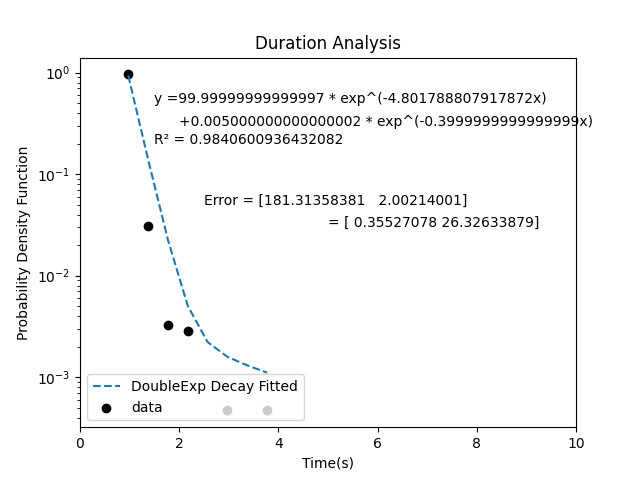

In [21]:
# fit the data with a monoExponential decay curve
def DoubleExp(x, a1, k1,a2,k2):
    return a1 * np.exp(-k1 * x) + a2 * np.exp(-k2 * x)

# perform the fit
# Here you give the initial parameters for a,b,c which Python then iterates over to find the best fit

popt, pcov = scipy.optimize.curve_fit(DoubleExp, xdata1, ydata1,p0=(10,5.0,1.0,1.0))
# a1 & a2 is the initial value A1 & A2, k1 & k2 is the decay constant
a1, k1,a2, k2 = popt


# popt, pcov = scipy.optimize.curve_fit(DoubleExp, xdata1, ydata1,p0=(50,5,5,0.1,0.01,0.1),maxfev=50000)
popt, pcov = scipy.optimize.curve_fit(DoubleExp, xdata1, ydata1,bounds=((10, 4, 0.005, 0.01), (100, 8, 1, 0.4)),maxfev=50000)

# a1 & a2 is the initial value A1 & A2, k1 & k2 is the decay constant
a1, k1, a2,k2 = popt
perr = np.sqrt(np.diag(pcov))
print(perr)



# determine quality of the fit
squaredDiffs = np.square(ydata1 - DoubleExp(xdata1, a1, k1,a2,k2))
squaredDiffsFromMean = np.square(ydata1 - np.mean(ydata1))
rSquared = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
print(f"R² = {rSquared}")

# # plot extroplating fitted curve
# xdata2 = np.arange(0,10,0.1)
# ydata2 = monoExp(xdata2, a, k)/a

# plot the results
plt.figure()
plt.scatter(xdata1, ydata1, color="k", label="data")
plt.plot(xdata1, DoubleExp(xdata1, a1, k1,a2,k2), '--', label="DoubleExp Decay Fitted")
# plt.plot(xdata2, monoExp(xdata2, a, k)/a, 'yellow', label="normarlized")

plt.text(1.5,0.5,'y =' + str(a1) + ' * exp^('+ str(-k1)+'x)')
plt.text(2,0.3,'+' +str(a2) + ' * exp^('+ str(-k2)+'x)')
plt.text(1.5,0.2,'R² = ' + str(rSquared))
plt.text(2.5,0.05,'Error = ' + str(perr[:2]))
plt.text(5,0.03,'= ' + str(perr[2:4]))

plt.yscale('log')
# plt.ylim(0.0001,1)
plt.xlim(0,10)
plt.legend(loc = 'lower left')
plt.ylabel('Probability Density Function')
plt.xlabel('Time(s)')
plt.title("Duration Analysis")
plt.show()

[10.6642603   0.07685885]
R² = 0.9952213843162898


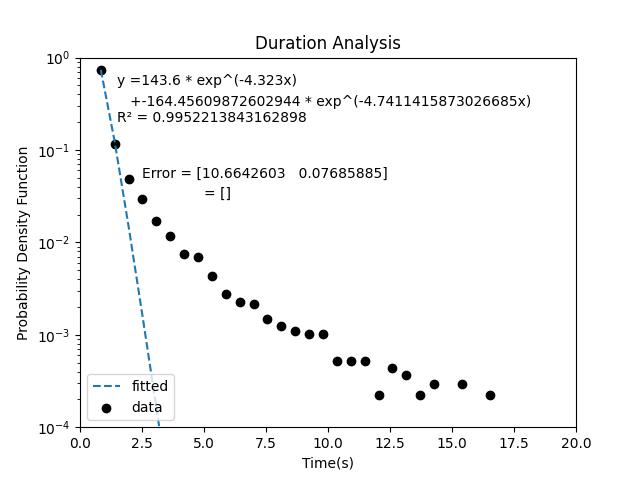

In [113]:
# fit the data with a monoExponential decay curve
def DoubleExp(x, a2,k2):
    return 143.6* np.exp(-4.323 * x) + a2 * np.exp(-k2 * x)

# perform the fit
# Here you give the initial parameters for a,b,c which Python then iterates over to find the best fit

popt, pcov = scipy.optimize.curve_fit(DoubleExp, xdata1, ydata1,p0=(1.0,1.0))
# a1 & a2 is the initial value A1 & A2, k1 & k2 is the decay constant
a2, k2 = popt
perr = np.sqrt(np.diag(pcov))
print(perr)

# determine quality of the fit
squaredDiffs = np.square(ydata1 - DoubleExp(xdata1, a2,k2))
squaredDiffsFromMean = np.square(ydata1 - np.mean(ydata1))
rSquared = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
print(f"R² = {rSquared}")

# # plot extroplating fitted curve
# xdata2 = np.arange(0,10,0.1)
# ydata2 = monoExp(xdata2, a, k)/a

# plot the results
plt.figure()
plt.scatter(xdata1, ydata1, color="k", label="data")
plt.plot(xdata1, DoubleExp(xdata1, a2,k2), '--', label="fitted")
# plt.plot(xdata2, monoExp(xdata2, a, k)/a, 'yellow', label="normarlized")

plt.text(1.5,0.5,'y =' + str(143.6) + ' * exp^('+ str(-4.323)+'x)')
plt.text(2,0.3,'+' +str(a2) + ' * exp^('+ str(-k2)+'x)')
plt.text(1.5,0.2,'R² = ' + str(rSquared))
plt.text(2.5,0.05,'Error = ' + str(perr[:2]))
plt.text(5,0.03,'= ' + str(perr[2:4]))

plt.yscale('log')
plt.ylim(0.0001,1)
plt.xlim(0,20)
plt.legend(loc = 'lower left')
plt.ylabel('Probability Density Function')
plt.xlabel('Time(s)')
plt.title("Duration Analysis")
plt.show()

In [114]:
pasuse

NameError: name 'pasuse' is not defined

In [ ]:
# # fit the data with a monoExponential decay curve
# def DoubleExp(x, a1, k1,k2):
#     return a1 * np.exp(-k1 * x) + (1-a1) * np.exp(-k2 * x)

# # perform the fit
# # Here you give the initial parameters for a,b,c which Python then iterates over to find the best fit

# popt, pcov = scipy.optimize.curve_fit(DoubleExp, xdata1, ydata1,p0=(1.0,1.0,1.0),bounds=((0, -np.inf, -np.inf), (1, np.inf, np.inf)))
# # a1 & a2 is the initial value A1 & A2, k1 & k2 is the decay constant
# a1, k1, k2 = popt

# # determine quality of the fit
# squaredDiffs = np.square(ydata1 - DoubleExp(xdata1, a1, k1,k2))
# squaredDiffsFromMean = np.square(ydata1 - np.mean(ydata1))
# rSquared = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
# print(f"R² = {rSquared}")

# # # plot extroplating fitted curve
# # xdata2 = np.arange(0,10,0.1)
# # ydata2 = monoExp(xdata2, a, k)/a

# # plot the results
# plt.figure()
# plt.scatter(xdata1, ydata1, color="k", label="data")
# plt.plot(xdata1, DoubleExp(xdata1, a1, k1,k2), '--', label="fitted")
# # plt.plot(xdata2, monoExp(xdata2, a, k)/a, 'yellow', label="normarlized")

# plt.text(1.5,0.5,'y =' + str(a1) + ' * exp^('+ str(-k1)+'x)')
# plt.text(2,0.3,'+' +str(1-a1) + ' * exp^('+ str(-k2)+'x)')
# plt.text(1.5,0.2,'R² = ' + str(rSquared))
# plt.yscale('log')
# plt.ylim(0.0001,1)
# plt.xlim(0,20)
# plt.legend(loc = 'lower left')
# plt.ylabel('Probability Density Function')
# plt.xlabel('Time(s)')
# plt.title("Duration Analysis")
# plt.show()

# Form now on, we start to bootstrap the data

In [ ]:
# random sampling
resampling_ratio = 0.8
resampling_times = 10000

# fit the data with a monoExponential decay curve
def DoubleExp(x, a1, k1,a2,k2):
    return a1 * np.exp(-k1 * x) + a2 * np.exp(-k2 * x)

# define a function to compute the decay constant from an exponential decay fit, with return of decay constant
def ExoDecFit (data):
    #calculate interquartile range and subsequent binwidth, and then histogram
    # q3, q1 = np.percentile(data, [75 ,25])
    # iqr = q3 - q1
    # binwidth = (2* iqr) * len(data) ** (-1/3)
    binwidth = 0.4
    ydata,base = np.histogram(data,bins = np.arange(min(data), max(data)+ binwidth, binwidth), weights=np.zeros_like(data) + 1. / data.size)
    xdata = base[:-1] + 0.5*binwidth
    xdata1 = xdata[np.where(xdata<18)]
    ydata1 = ydata[np.where(xdata<18)]

    # perform the fit
    # Here you give the initial parameters for a,b,c which Python then iterates over to find the best fit
    try:
        popt, pcov = scipy.optimize.curve_fit(DoubleExp, xdata1, ydata1,p0=(1.0,1.0,1.0,1.0))
    except RuntimeError:
        pass
    # a1 & a2 is the initial value A1 & A2, k1 & k2 is the decay constant
    # a1, k1, a2, k2 = popt
    return popt

fit_res_ls = []
for i in range (resampling_times):
    # random sampling with replacement method,
    data_resampling = np.random.choice(data, size= int(resampling_ratio * len(data)), replace=True)
    fit_res = ExoDecFit(data_resampling)
    fit_res_ls.append(fit_res)

        # return format(np.mean(decay_constant_ls),'.4f'),format (np.std(decay_constant_ls),'.4f')
    
print(len(fit_res_ls))
# print(np.mean(decay_constant_ls))
# print(np.std(decay_constant_ls))

In [ ]:
pasue

In [ ]:
# plot the results
plt.figure()
plt.scatter(xdata1, ydata1, color="k", label="data")
plt.plot(xdata1, monoExp(xdata1, a, k), '--', label="fitted")
plt.plot(xdata2, monoExp(xdata2, a, k)/a, 'yellow', label="normarlized")

plt.text(1.5,0.7,'y =' + str(a) + ' * exp^('+ str(-k)+'x)')
plt.text(1.5,0.5,'R² = ' + str(rSquared))
plt.text(1.5,0.3,'bootstrap results:'+ '('+ str(resampling_ratio*100) + ' % of the raw data ' + 'for' + str(resampling_times) + ' times )')
plt.text(1.5,0.2,'N = ' + str(len(data)))
plt.text(1.5,0.15,'koff = ' + str(np.mean(decay_constant_ls)) + '±' +  str(np.std(decay_constant_ls)))

plt.yscale('log')
plt.ylim(0.001,1)
plt.xlim(0,8)
plt.legend(loc = 'lower right')
plt.ylabel('Probability Density Function')
plt.xlabel('Time(s)')
plt.title("Duration Analysis")
plt.show()
# plt.savefig(trace_file[:-18]+ 'duration-analysis' +'.png', dpi=300)
# plt.savefig(trace_file[:-5]+ '_duration-analysis' +'.png', dpi=300)

In [ ]:
pause
# we will not use the following codes

In [ ]:
duration = mydata
time_bin = xdata2
frequency_fit = monoExp(xdata2, a, k)
frequency_fit_norm = monoExp(xdata2, a, k)/a
fit_data =  np.vstack((time_bin,frequency_fit,frequency_fit_norm)).T
exp_output = np.array([duration,fit_data],dtype=object)
print(exp_output)
np.save(trace_file[:-4]+ '_duration-analysis' + '.npy', exp_output, allow_pickle=True)

In [ ]:
pause
exp_output = np.load(trace_file[:-4]+ '_duration-analysis' + '.npy', allow_pickle=True)
frequency_fit_norm = exp_output[1][:,2]

In [ ]:
# read and plot the trajectory analysis data from Kymotracker
name = input('please type in the file name:' ) 
path = input('please type in the file path:')
file = os.path.join(path, name) 
exp_output_2 = np.load(file, allow_pickle=True)

In [ ]:
time = np.arange(0,15,0.5)
frequency_fit_norm_1 = exp_output_1[1][:,2]
frequency_fit_norm_2 = exp_output_2[1][:,2]
# frequency_fit_norm_3 = exp_output_3[1][:,2]
# frequency_fit_norm_4 = exp_output_4[1][:,2]
# frequency_fit_norm_5 = exp_output_5[1][:,2]
# frequency_fit_norm_6 = exp_output_6[1][:,2]
# frequency_fit_norm_7 = exp_output_7[1][:,2]


plt.figure()
plt.scatter(time,frequency_fit_norm_1,color = 'r')
plt.plot(time,frequency_fit_norm_1,'--')
plt.scatter(time,frequency_fit_norm_2,color = 'blue')
plt.plot(time,frequency_fit_norm_2,'--')
# plt.scatter(time,frequency_fit_norm_3,color = 'green')
# plt.plot(time,frequency_fit_norm_3,'--')
# plt.scatter(time,frequency_fit_norm_4,color = 'green')
# plt.plot(time,frequency_fit_norm_4,'--')
# plt.scatter(time,frequency_fit_norm_5,color = 'green')
# plt.plot(time,frequency_fit_norm_5,'--')
# plt.scatter(time,frequency_fit_norm_6,color = 'green')
# plt.plot(time,frequency_fit_norm_6,'--')
# plt.scatter(time,frequency_fit_norm_7,color = 'green')
# plt.plot(time,frequency_fit_norm_7,'--')
# plt.plot(time,(frequency_fit_norm_1+frequency_fit_norm_2+frequency_fit_norm_3+frequency_fit_norm_4+frequency_fit_norm_5+frequency_fit_norm_6+frequency_fit_norm_7)/7,linewidth = 3,color = "black",label ="average")

plt.xlabel('Time(s)')
plt.ylabel("Frequency")
plt.yscale('log')
plt.ylim(0.01,1)
plt.xlim(0,15)
plt.title("Duration Analysis")
plt.legend()

plt.show()
# fig.savefig('_duration-analysis' +'.png', dpi=150)